In [18]:
# synthetic survey dataset with the following columns:

# Age (numeric)

# Gender (Male, Female, Other)

# Preferred_Tool (Python, R, SQL, Excel, Power BI, Tableau)

# Satisfaction_Score (1 to 5)

# Learning_Preference (Videos, Textbooks, Interactive, Bootcamps)

import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Sample data
n = 300  # number of survey responses
data = {
    "Age": np.random.randint(18, 55, n),
    "Gender": np.random.choice(["Male", "Female", "Other"], n, p=[0.45, 0.45, 0.10]),
    "Preferred_Tool": np.random.choice(["Python", "R", "SQL", "Excel", "Power BI", "Tableau"], n),
    "Satisfaction_Score": np.random.randint(1, 6, n),
    "Learning_Preference": np.random.choice(["Videos", "Textbooks", "Interactive", "Bootcamps"], n)
}

df = pd.DataFrame(data)
df.head()

,Age,Gender,Preferred_Tool,Satisfaction_Score,Learning_Preference
0,46,Female,SQL,2,Videos
1,32,Male,SQL,2,Textbooks
2,25,Male,R,5,Videos
3,38,Female,Excel,3,Interactive
4,36,Female,Python,2,Videos


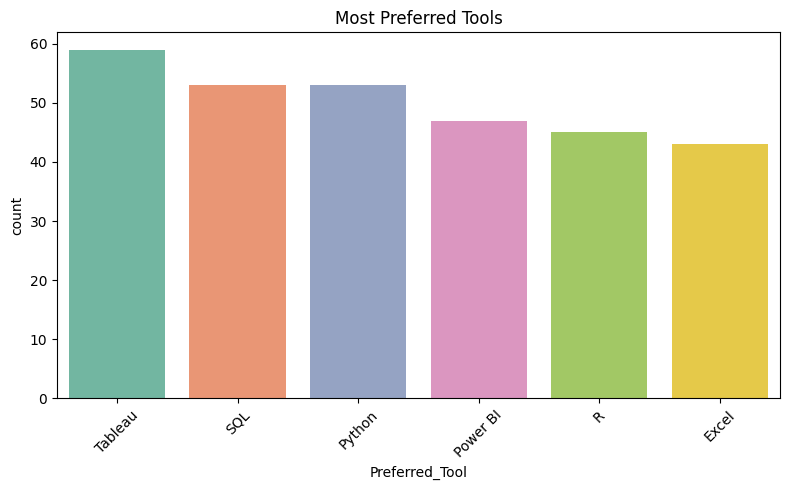

In [19]:
# Bar Chart – Preferred Tools Count:

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Preferred_Tool', data=df, order=df['Preferred_Tool'].value_counts().index, palette="Set2")
plt.title('Most Preferred Tools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("preferred_tools.png")
plt.show()

The bar chart shows that Tableau is the most preferred tool among respondents, followed by SQL and Python. Tools like Excel, R, and Power BI are slightly less favored but still significantly used.

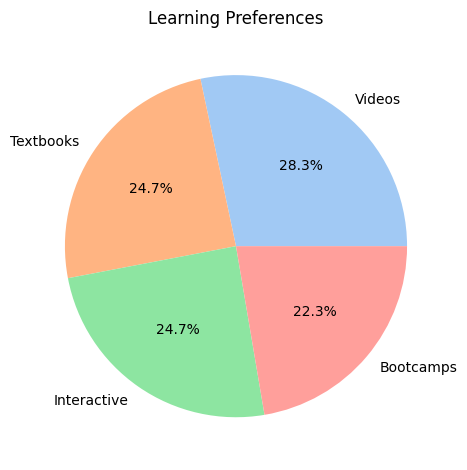

In [20]:
# Pie Chart – Learning Preference:

df['Learning_Preference'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Learning Preferences')
plt.ylabel('')
plt.tight_layout()
plt.savefig("learning_prefs.png")
plt.show()

The pie chart shows that Videos are the most preferred learning method (28.3%), followed closely by Textbooks and Interactive methods (24.7% each). Bootcamps are the least preferred among the four options, with 22.3% of the responses.

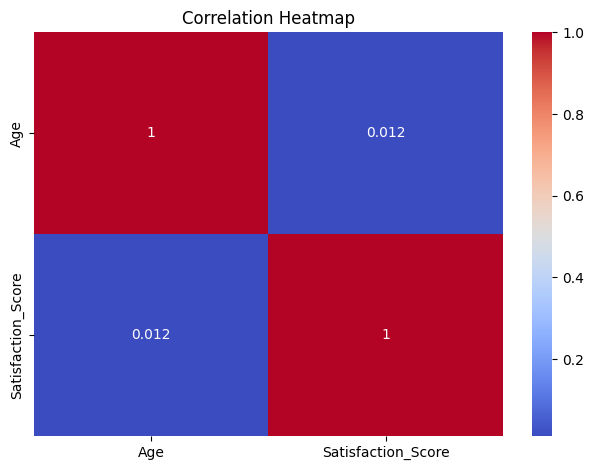

In [21]:
# Heatmap – Correlation (Age vs Satisfaction Score):

corr = df[['Age', 'Satisfaction_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("corr_heatmap.png")
plt.show()

The correlation heatmap shows a very weak positive correlation (0.012) between Age and Satisfaction Score, indicating that age has almost no impact on user satisfaction.

In [39]:
# 1. Bar Chart – Preferred Tools
bar_fig = px.bar(
    df,
    x=df['Preferred_Tool'].value_counts().index,
    y=df['Preferred_Tool'].value_counts().values,
    labels={'x': 'Tool', 'y': 'Count'}
)
bar_fig.update_layout(title='Preferred Tools')
bar_fig.show()

In [ ]:
# 2. Interactive Pie Chart – Learning Preferences

fig = px.pie(df,
             names='Learning_Preference',
             title='Learning Preferences (Interactive)',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [33]:
# 3. Scatter Plot – Age vs Satisfaction Score

fig = px.scatter(df,
                 x='Age',
                 y='Satisfaction_Score',
                 color='Preferred_Tool',
                 title='Age vs Satisfaction Score by Tool',
                 hover_data=['Gender', 'Learning_Preference'])
fig.show()

In [36]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("Survey_Report.pdf") as pdf:
    for img in ["preferred_tools.png", "learning_prefs.png", "heatmap.png"]:
        fig = plt.figure()
        img_data = plt.imread(img)
        plt.imshow(img_data)
        plt.axis('off')
        pdf.savefig(fig)
        plt.close()

print("✅ PDF Report Generated!")

✅ PDF Report Generated!
